In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models

In [81]:
#Se descarga base de datos
data = pd.read_csv('bank-full.csv', sep = ";")

## **Analisis** **Inicial**

In [82]:
#Se observa informacion inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [83]:
#Se buscan datos faltantes
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [84]:
#Se observa una muestra de los datos para observar posibles particularidades para planear limpieza de datos. Se buscan datos incompletos e incongruencias.
data.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


No se detectaron valores nulos al hacer una revision de los datos. Por otro lado, no existen incongruencias con variables categoricas o numericas, siguen el formato estipulado en el archivo bank-diccionario. Debido a esto los pasos a realizar son los siguientes:
- Identificar y eliminar datos duplicados
- Cambio en datos categoricos para facilidad de los modelos


# Paso 1: Encontrar duplicados

In [85]:
data.shape

(45211, 17)

In [86]:
# Find duplicate rows based on all columns
duplicate_rows = data[data.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

# Remove duplicate rows and keep the first occurrence
data = data.drop_duplicates()

# Print the shape of the DataFrame after removing duplicates
print("Shape of DataFrame after removing duplicates:", data.shape)

Duplicate Rows:
Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []
Shape of DataFrame after removing duplicates: (45211, 17)


Ya que el dataframe no cambio de tamano se puede concluir que no existen duplicados


## Paso 3: Datos atipicos


es necesario revisar los datos numericos para poder eliminar posibles atipicos

In [87]:
data_num = data[["age","balance","campaign", "pdays", "previous"]]

In [88]:
data_num.describe()

,age,balance,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,2.763841,40.197828,0.580323
std,10.618762,3044.765829,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,63.000000,871.000000,275.000000


Esta linea de codigo nos muestra que hay una gran desviacion estandar. Esto indica que hay valores atipicos.

<Axes: >

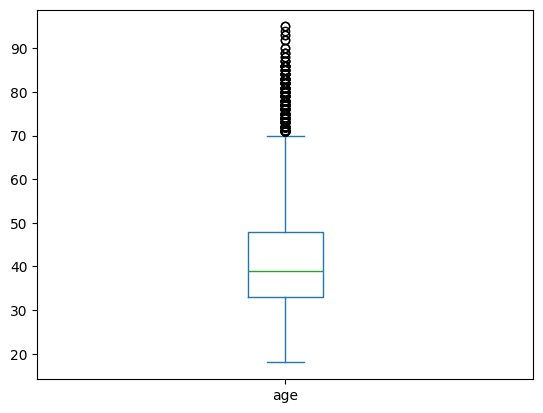

In [89]:
data_num["age"].plot(kind='box')


<Axes: >

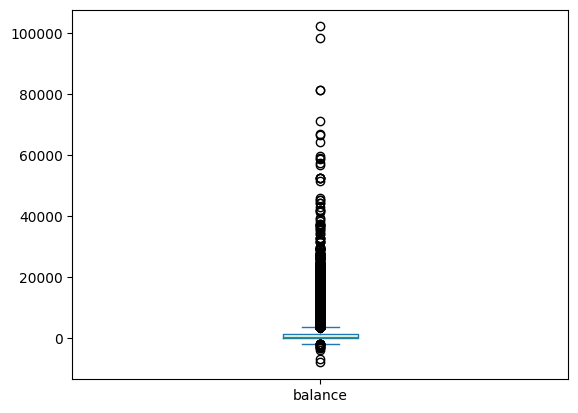

In [90]:
data_num["balance"].plot(kind='box')

<Axes: >

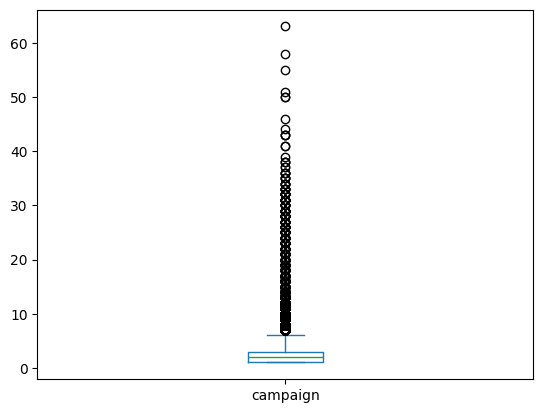

In [91]:
data_num["campaign"].plot(kind='box')

<Axes: >

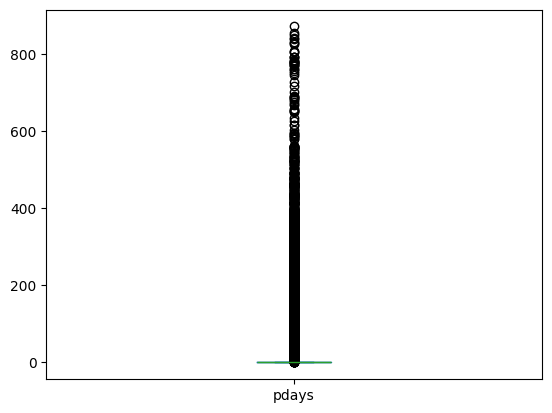

In [92]:
data_num["pdays"].plot(kind='box')

<Axes: >

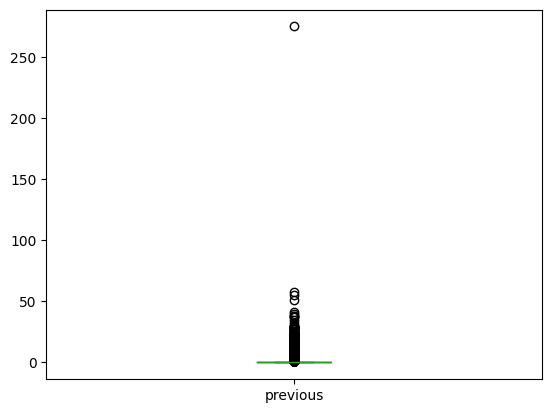

In [93]:
data_num["previous"].plot(kind='box')

visto esto, no se borraran atipicos de pdays pues hay una cantidad continua de datos hasta el limite superior. Para previous se pondra un limite de datos en 50 al ser donde termina la existencia recurrente de datos. Por esta misma razon, campaign se limitara a 40. Para Age y Balance tomaremos un maximo de 3 desviaciones estandar sobre la media



In [98]:
# Calcular media y desviación estándar
media_age = data['age'].mean()
desviacion_estandar_age = data['age'].std()

media_balance = data['balance'].mean()
desviacion_estandar_balance = data['balance'].std()

# Definir los límites
limite_inferior_age = media_age - 3 * desviacion_estandar_age
limite_superior_age = media_age + 3 * desviacion_estandar_age

limite_inferior_balance = media_balance - 3 * desviacion_estandar_balance
limite_superior_balance = media_balance + 3 * desviacion_estandar_balance

# Filtrar los datos dentro de los límites
data_no_outliers = data[(data['age'] >= limite_inferior_age) & (data['age'] <= limite_superior_age)]
data_no_outliers = data_no_outliers[(data['balance'] >= limite_inferior_balance) & (data['balance'] <= limite_superior_balance)]
data_no_outliers = data_no_outliers[(data['previous'] <= 50)]
data_no_outliers = data_no_outliers[(data['campaign'] <= 50)]

print("Datos sin atípicos:")
print(data_no_outliers)


Datos sin atípicos:
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  du

<Axes: >

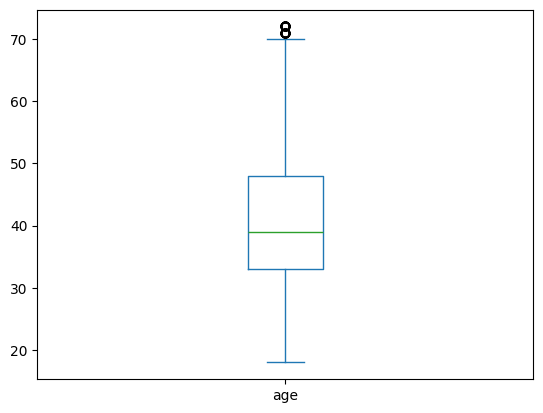

In [95]:
data_no_outliers["age"].plot(kind='box')

## Paso 3: Cambio de variables categoricas para facildiad de analisis

Primero cambiamos las varibales binarias por 0s y 1s, luego las otras variables categoricas con metodo HotEncoder

In [100]:
data_clean = data_no_outliers
data_clean[["default", "housing","loan", "y"]] = data_clean[["default", "housing","loan", "y"]].apply(lambda x: x.map({"yes":1, "no": 0}))

In [101]:
columnas_numericas = ["age", "default", "balance", "housing", "loan", "day", "duration","campaign", "pdays", "previous", "y" ]  
columnas_categoricas = ["job", "marital", "education", "contact", "month", "poutcome"]  

In [103]:
# Configura el ColumnTransformer para transformar solo las columnas categóricas
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas)
    ],
    remainder='passthrough'  # Deja las columnas numéricas sin cambios
)

# Aplica la transformación
df_transformado = preprocesador.fit_transform(data_clean)

# Crear nombres de columnas para el DataFrame transformado
columnas_categoricas_transformadas = preprocesador.named_transformers_['cat'].get_feature_names_out(columnas_categoricas)
nombres_columnas = list(columnas_categoricas_transformadas) + [col for col in data_clean.columns if col not in columnas_categoricas]

# Convertir a DataFrame con las columnas originales y transformadas
data_transformada = pd.DataFrame(df_transformado, columns=nombres_columnas)

print(data_transformada)

       job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0             0.0              0.0               0.0            0.0   
1             0.0              0.0               0.0            0.0   
2             0.0              0.0               1.0            0.0   
3             0.0              1.0               0.0            0.0   
4             0.0              0.0               0.0            0.0   
...           ...              ...               ...            ...   
44081         0.0              0.0               0.0            0.0   
44082         0.0              0.0               0.0            0.0   
44083         0.0              0.0               0.0            0.0   
44084         0.0              1.0               0.0            0.0   
44085         0.0              0.0               1.0            0.0   

       job_management  job_retired  job_self-employed  job_services  \
0                 1.0          0.0                0.0           0.0   
1    

## 4. Bases de datos limpias
data_clean es una base de datos limpia en tanto a outliers, duplicados y faltantes. En esta base de datos las variables categoricas binarias (yes or no) estan en formato binario (1 = yes, 0 = no)
data_transformada corresponde a la base de datos, realizando cambios a las variables categoricas por metodo Hot Encoder. Esta base de datos no se recomienda para vizualizaciones pero si para modelos de redes neuronales.

In [104]:
## Exportar la base de datos de vizualizaciones a csv para facilidad de manejo
data_clean.to_csv('data_clean.csv', index=False)